In [20]:
import random
import numpy as np
import matplotlib.pyplot as plt

def binary_random(p):
    return (random.uniform(0, 1) < p)

def initial_prob_vector(d):
    return np.array([0.5]*d)

def random_individual(prob_vector,d):
    return np.array([binary_random(prob_vector[i]) for i in range(d)])
    

def random_population(prob_vector,N,d):
    return np.array([random_individual(prob_vector,d) for i in range(N)])

def population_evaluation(P, f):
    values = [f(i) for i in P]
    return np.array(values)
    

def pbil(f,N,T,t1,t2,t3,d):
    prob_vector = initial_prob_vector(d)
    P = random_population(prob_vector,N,d)
    pop_eval = population_evaluation(P,f)
    
    for t in range(T):
        best = P[np.argmax(pop_eval)]
        prob_vector = prob_vector*(1-t1)+best*t1
        for k in range(d):
            if random.uniform(0, 1) < t2:
                prob_vector[k]=prob_vector[k]*(1-t3)+binary_random(0.5)*t3
        P = random_population(prob_vector,N,d)
        pop_eval = population_evaluation(P,f)
        
    return P[np.argmax(pop_eval)]
    

def one_max(p):
    return np.sum(p)

def deceptive_one_max(p):
    sum = np.sum(p)
    if (sum):
        return sum
    else:
        return len(p)+1

def k_deceptive_one_max(p,k=3):
    n = len(p)
    parts = [p[i * n // k:(i + 1) * n // k] for i in range(k)]
    return np.sum([deceptive_one_max(i) for i in parts])
    



## One-max

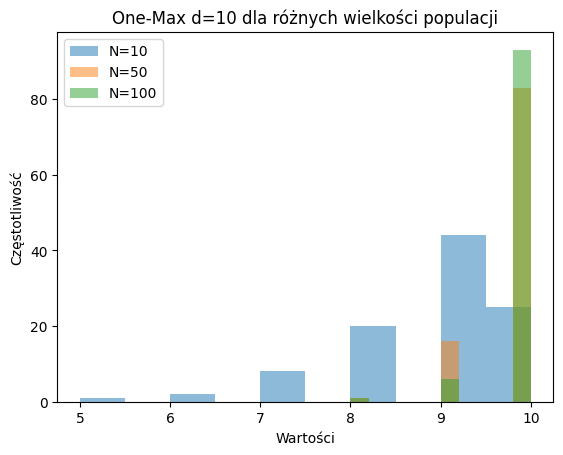

In [11]:
T = 1000
d = 10
t1 = 0.5
t2 = 0.5
t3 = 0.5

'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
population_sizes = [10, 50, 100]  
results = {size: [] for size in population_sizes}  

for size in population_sizes:
    for _ in range(num_of_experiments):
        results[size].append(np.sum(pbil(one_max, size, T, t1, t2, t3, d)))


plt.figure()
for size in population_sizes:
    plt.hist(results[size], alpha=0.5, label=f'N={size}')


plt.title("One-Max d=10 dla różnych wielkości populacji")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


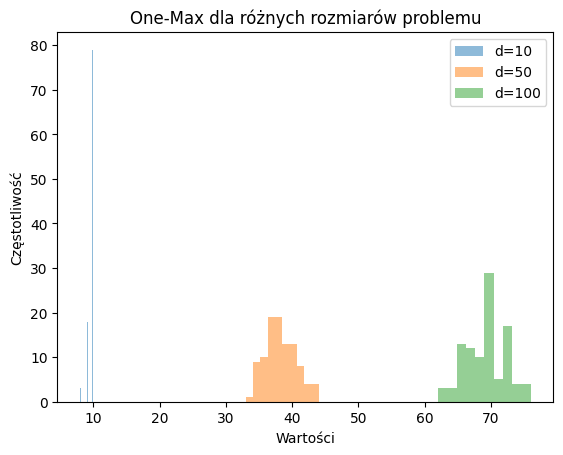

In [12]:
T = 1000
d = 10
N = 50
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
problem_sizes = [10, 50, 100]  
results = {size: [] for size in population_sizes}  

for size in problem_sizes:
    for _ in range(num_of_experiments):
        results[size].append(np.sum(pbil(one_max, N, T, t1, t2, t3, size)))


plt.figure()
for size in problem_sizes:
    plt.hist(results[size], bins=10, alpha=0.5, label=f'd={size}')


plt.title("One-Max dla różnych rozmiarów problemu")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


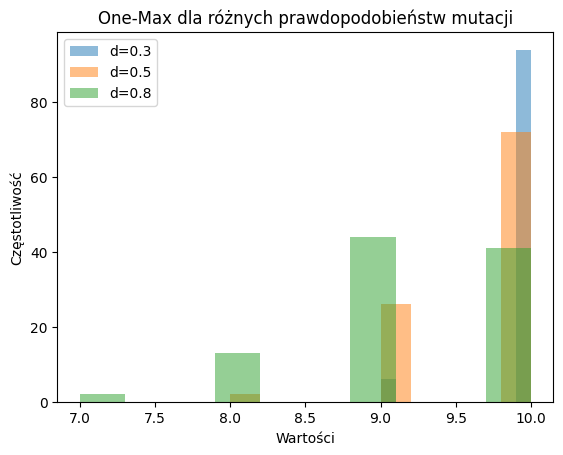

In [13]:
T = 1000
d = 10
N = 50
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
prob_mut = [0.3, 0.5, 0.8]  
results = {prob: [] for prob in prob_mut}  

for prob in prob_mut:
    for _ in range(num_of_experiments):
        results[prob].append(np.sum(pbil(one_max, N, T, t1, prob, t3, d)))


plt.figure()
for prob in prob_mut:
    plt.hist(results[prob], bins=10, alpha=0.5, label=f'd={prob}')


plt.title("One-Max dla różnych prawdopodobieństw mutacji")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


## Deceptive one-max

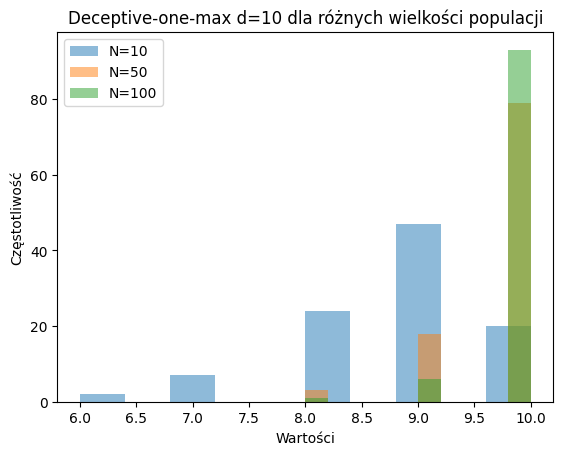

In [14]:
T = 1000
d = 10
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
population_sizes = [10, 50, 100]  
results = {size: [] for size in population_sizes}  

for size in population_sizes:
    for _ in range(num_of_experiments):
        results[size].append(np.sum(pbil(deceptive_one_max, size, T, t1, t2, t3, d)))


plt.figure()
for size in population_sizes:
    plt.hist(results[size], alpha=0.5, label=f'N={size}')


plt.title("Deceptive-one-max d=10 dla różnych wielkości populacji")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


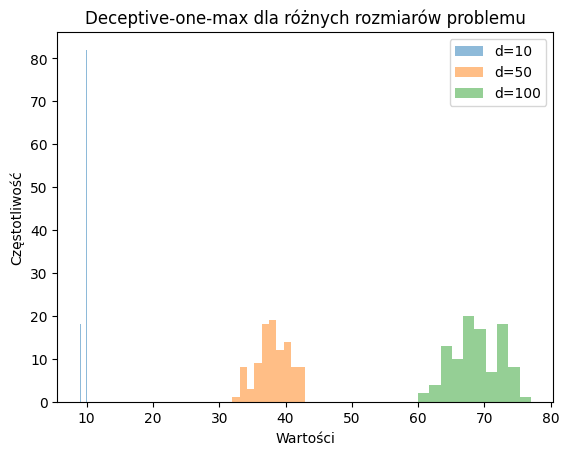

In [15]:
T = 1000
d = 10
N = 50
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
problem_sizes = [10, 50, 100]  
results = {size: [] for size in population_sizes}  

for size in problem_sizes:
    for _ in range(num_of_experiments):
        results[size].append(np.sum(pbil(deceptive_one_max, N, T, t1, t2, t3, size)))


plt.figure()
for size in problem_sizes:
    plt.hist(results[size], bins=10, alpha=0.5, label=f'd={size}')


plt.title("Deceptive-one-max dla różnych rozmiarów problemu")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


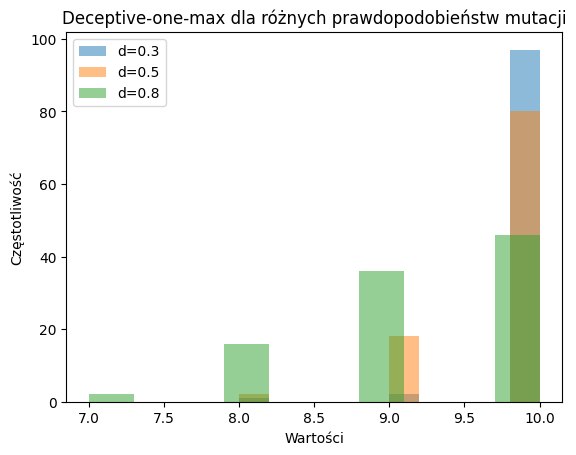

In [16]:
T = 1000
d = 10
N = 50
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
prob_mut = [0.3, 0.5, 0.8]  
results = {prob: [] for prob in prob_mut}  

for prob in prob_mut:
    for _ in range(num_of_experiments):
        results[prob].append(np.sum(pbil(deceptive_one_max, N, T, t1, prob, t3, d)))


plt.figure()
for prob in prob_mut:
    plt.hist(results[prob], bins=10, alpha=0.5, label=f'd={prob}')


plt.title("Deceptive-one-max dla różnych prawdopodobieństw mutacji")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


## K-deceptive one-max

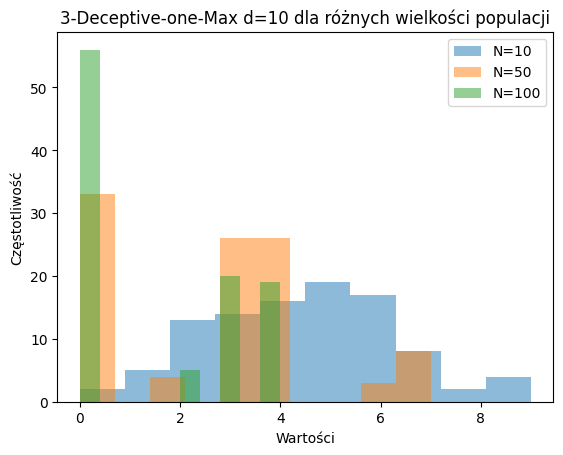

In [17]:
T = 1000
d = 10
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
population_sizes = [10, 50, 100]  
results = {size: [] for size in population_sizes}  

for size in population_sizes:
    for _ in range(num_of_experiments):
        results[size].append(np.sum(pbil(k_deceptive_one_max, size, T, t1, t2, t3, d)))


plt.figure()
for size in population_sizes:
    plt.hist(results[size], alpha=0.5, label=f'N={size}')


plt.title("3-Deceptive-one-Max d=10 dla różnych wielkości populacji")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


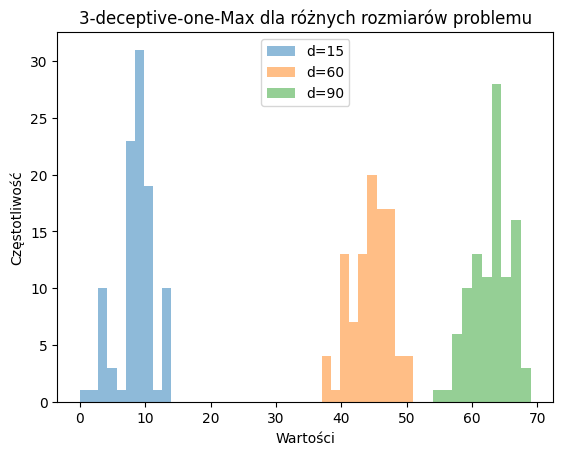

In [18]:
T = 1000
d = 10
N = 50
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
problem_sizes = [15, 60, 90]  
results = {size: [] for size in problem_sizes}  

for size in problem_sizes:
    for _ in range(num_of_experiments):
        results[size].append(np.sum(pbil(k_deceptive_one_max, N, T, t1, t2, t3, size)))


plt.figure()
for size in problem_sizes:
    plt.hist(results[size], bins=10, alpha=0.5, label=f'd={size}')


plt.title("3-deceptive-one-Max dla różnych rozmiarów problemu")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


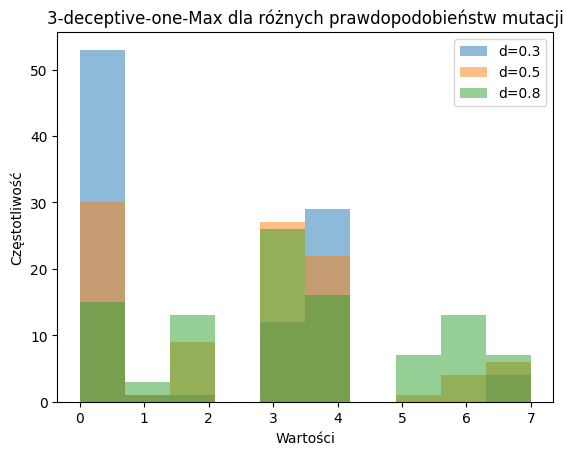

In [19]:
T = 1000
d = 10
N = 50
t1 = 0.5
t2 = 0.5
t3 = 0.5
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 100
prob_mut = [0.3, 0.5, 0.8]  
results = {prob: [] for prob in prob_mut}  

for prob in prob_mut:
    for _ in range(num_of_experiments):
        results[prob].append(np.sum(pbil(k_deceptive_one_max, N, T, t1, prob, t3, d)))


plt.figure()
for prob in prob_mut:
    plt.hist(results[prob], bins=10, alpha=0.5, label=f'd={prob}')


plt.title("3-deceptive-one-Max dla różnych prawdopodobieństw mutacji")
plt.xlabel("Wartości")
plt.ylabel("Częstotliwość")
plt.legend()
plt.show()


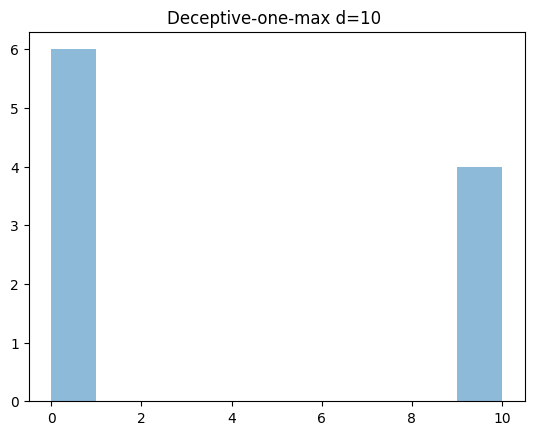

In [24]:
T = 5000
d = 10
t1 = 0.5
t2 = 0.3
t3 = 0.2
'''
θ1 - współczynnik uczenia
θ2 - prawdopodobieństwo mutacji
θ3 - współczynnik zaburzenia podczas mutacji
'''
num_of_experiments = 10
N = 1000
results = []


for _ in range(num_of_experiments):
        results.append(np.sum(pbil(deceptive_one_max, N, T, t1, t2, t3, d)))


plt.figure()

plt.hist(results, alpha=0.5)


plt.title("Deceptive-one-max d=10 ")

plt.show()
